In [1]:
# 2.1

import numpy as np
import pandas as pd

from dplython import (DplyFrame, X, sample_n, sample, mutate, group_by, summarize, DelayFunction) 

import pyreadr
import seaborn as sns

result = pyreadr.read_r('../data/fake_news.rda')

df = result['fake_news']
df = DplyFrame(df)

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pyreadr/_pyreadr_writer.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int64, np.uint64, np.uint32, np.float, pd.Int64Dtype(), pd.UInt32Dtype(), pd.UInt64Dtype(),


In [2]:
# 2.2 

df['type'].value_counts(normalize=True)

real    0.6
fake    0.4
Name: type, dtype: float64

In [3]:
# 2.2

df['type'].value_counts()

real    90
fake    60
Name: type, dtype: int64

In [4]:
# 2.3

df.groupby(["title_has_excl", "type"]).count()["title"]

title_has_excl  type
False           fake    44
                real    88
True            fake    16
                real     2
Name: title, dtype: int64

## Posterior Simulation

In [5]:
# 2.4

data = {"type": ["real", "fake"]}

article = pd.DataFrame(data)
prior = np.array([0.6, 0.4])

In [6]:
# 2.5

article.sample(n=3, replace=True, weights=prior)

,type
1,fake
1,fake
0,real


In [7]:
# 2.6

np.random.RandomState(84735)

article.sample(n=3, replace=True, weights=prior, random_state=np.random.RandomState(84735))

,type
0,real
1,fake
1,fake


In [8]:
# 2.7

article_sim = article.sample(n=10000, replace=True, weights=prior, random_state=np.random.RandomState(84735))

<AxesSubplot:>

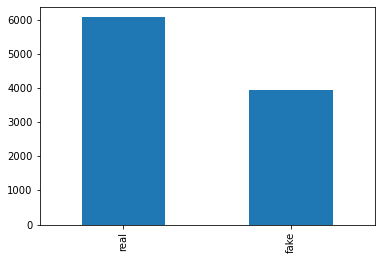

In [9]:
# 2.8

article_sim['type'].value_counts().plot(kind='bar')

In [10]:
# 2.9

article_sim['type'].value_counts()

real    6062
fake    3938
Name: type, dtype: int64

In [11]:
# 2.10

article_sim["data_model"] = np.where(article_sim['type']=="real", 0.0222, 0.2667)
article_sim.head()

,type,data_model
0,real,0.0222
1,fake,0.2667
1,fake,0.2667
1,fake,0.2667
1,fake,0.2667


In [12]:
# 2.11

probs = np.array([0.2667, 0.0222])
choices = np.array(["no", "yes"])

## 2.2 Example: Pop vs soda vs coke

In [20]:
# 2.12 
result = pyreadr.read_r('../data/pop_vs_soda.rda')

df = result['pop_vs_soda']

In [21]:
df

,state,region,word_for_cola,pop
0,alabama,south,pop,True
1,alabama,south,pop,True
2,alabama,south,pop,True
3,alabama,south,pop,True
4,alabama,south,pop,True
...,...,...,...,...
374245,wyoming,west,other,False
374246,wyoming,west,other,False
374247,wyoming,west,other,False
374248,wyoming,west,other,False


In [24]:
# 2.13
df.groupby('region')['pop'].value_counts(normalize=True)

region     pop  
midwest    True     0.644704
           False    0.355296
northeast  False    0.726603
           True     0.273397
south      False    0.920778
           True     0.079222
west       False    0.705721
           True     0.294279
Name: pop, dtype: float64

In [27]:
# 2.14

chess = pd.DataFrame({ "pi": [0.2, 0.5, 0.8]})
prior = np.array([0.10, 0.25, 0.65])

In [29]:
# 2.15

# Simulate 10000 values of pi from the prior
chess_sim = chess.sample(n=10000, replace=True, weights=prior, random_state=np.random.RandomState(84735))

In [39]:
chess_sim['y'] = np.random.binomial(6, chess_sim['pi'])

In [40]:
chess_sim.head()

,pi,y
1,0.5,4
2,0.8,6
2,0.8,5
2,0.8,6
2,0.8,6


/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

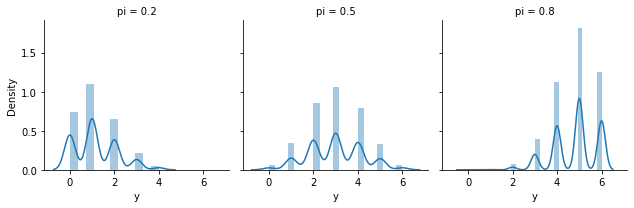

In [52]:
g = sns.FacetGrid(chess_sim, col="pi")
g.map(sns.distplot, "y")

In [54]:
win_one = chess_sim[chess_sim["y"] == 1]
win_one['pi'].value_counts(normalize=True)

0.2    0.622926
0.5    0.365008
0.8    0.012066
Name: pi, dtype: float64

/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/plotnine/geoms/geom_rect.py:62: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.


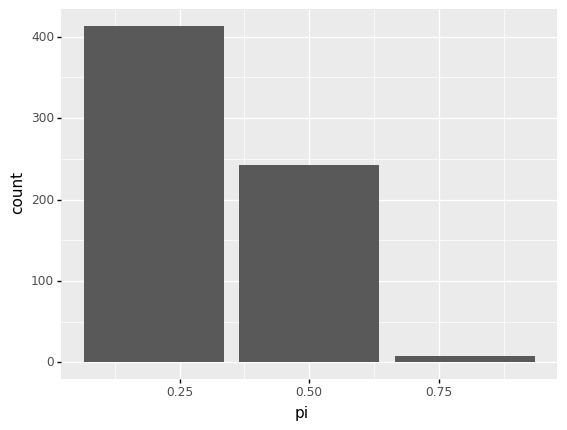

<ggplot: (314366067)>

In [58]:
from plotnine import ggplot, aes, geom_bar

ggplot(win_one, aes(x = win_one["pi"])) + geom_bar()